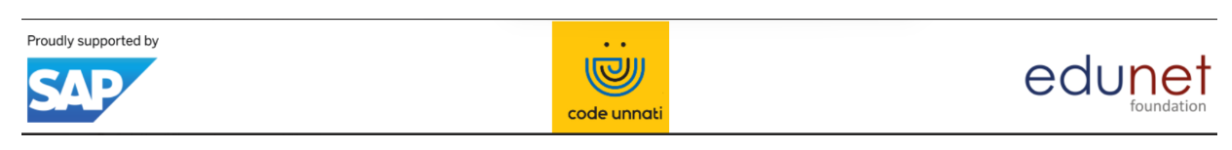

<span style="color:black;font-size: 30px; font-family: Arial; font-weight: bold;">EDUNET FOUNDATION - Classroom Exercise Notebook</span>

# Lab - 3  Visualizing the distribution of data for multi-variate analysis


### ➡️ Welcome to Data Visualization


### ➡️ Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Collect the Data
Seaborn comes with built-in data sets!

In [2]:
df = pd.read_csv("/content/Automobile_data.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


##  | Pair Plot |

#### Pair Plot is used for plotting pairwise relationships in a dataset.

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:



#### ➡️ official documentation   :-  https://seaborn.pydata.org/generated/seaborn.pairplot.html

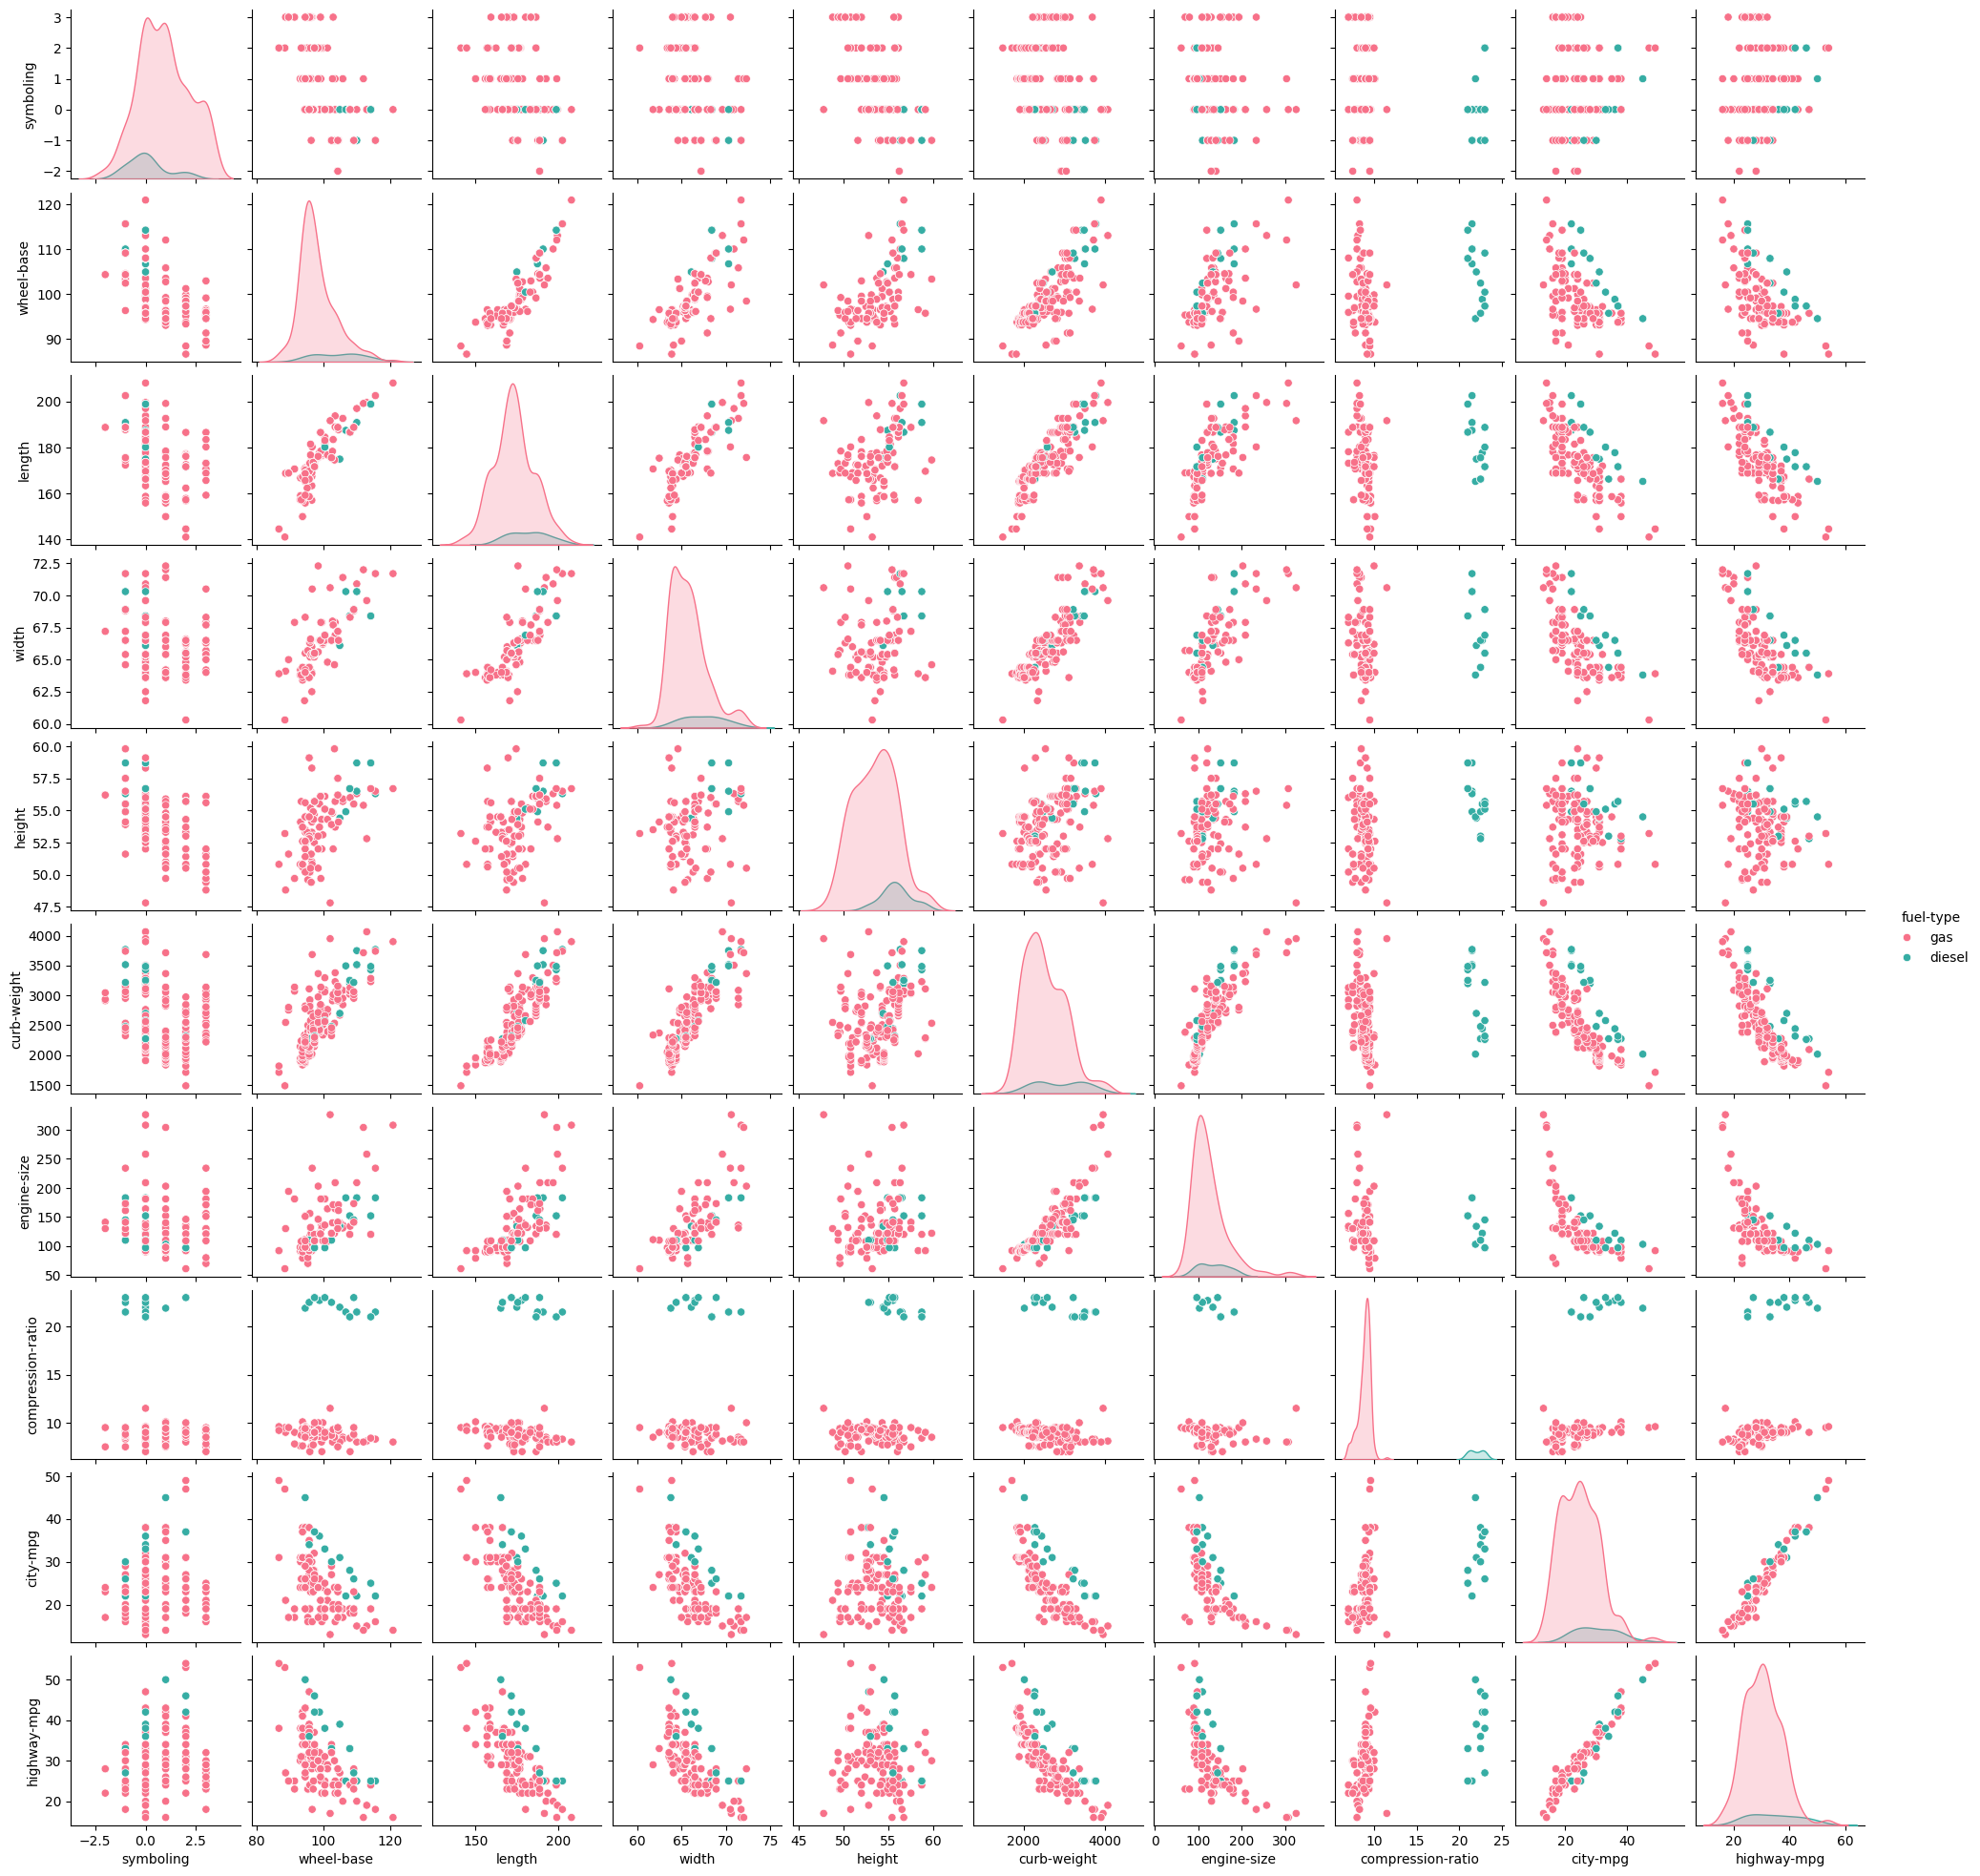

In [4]:
# Draw scatterplots for joint relationships and histograms for univariate distributions
# Changing palettes
sns.pairplot(df,hue = 'fuel-type',palette="husl",size=2)
plt.show()

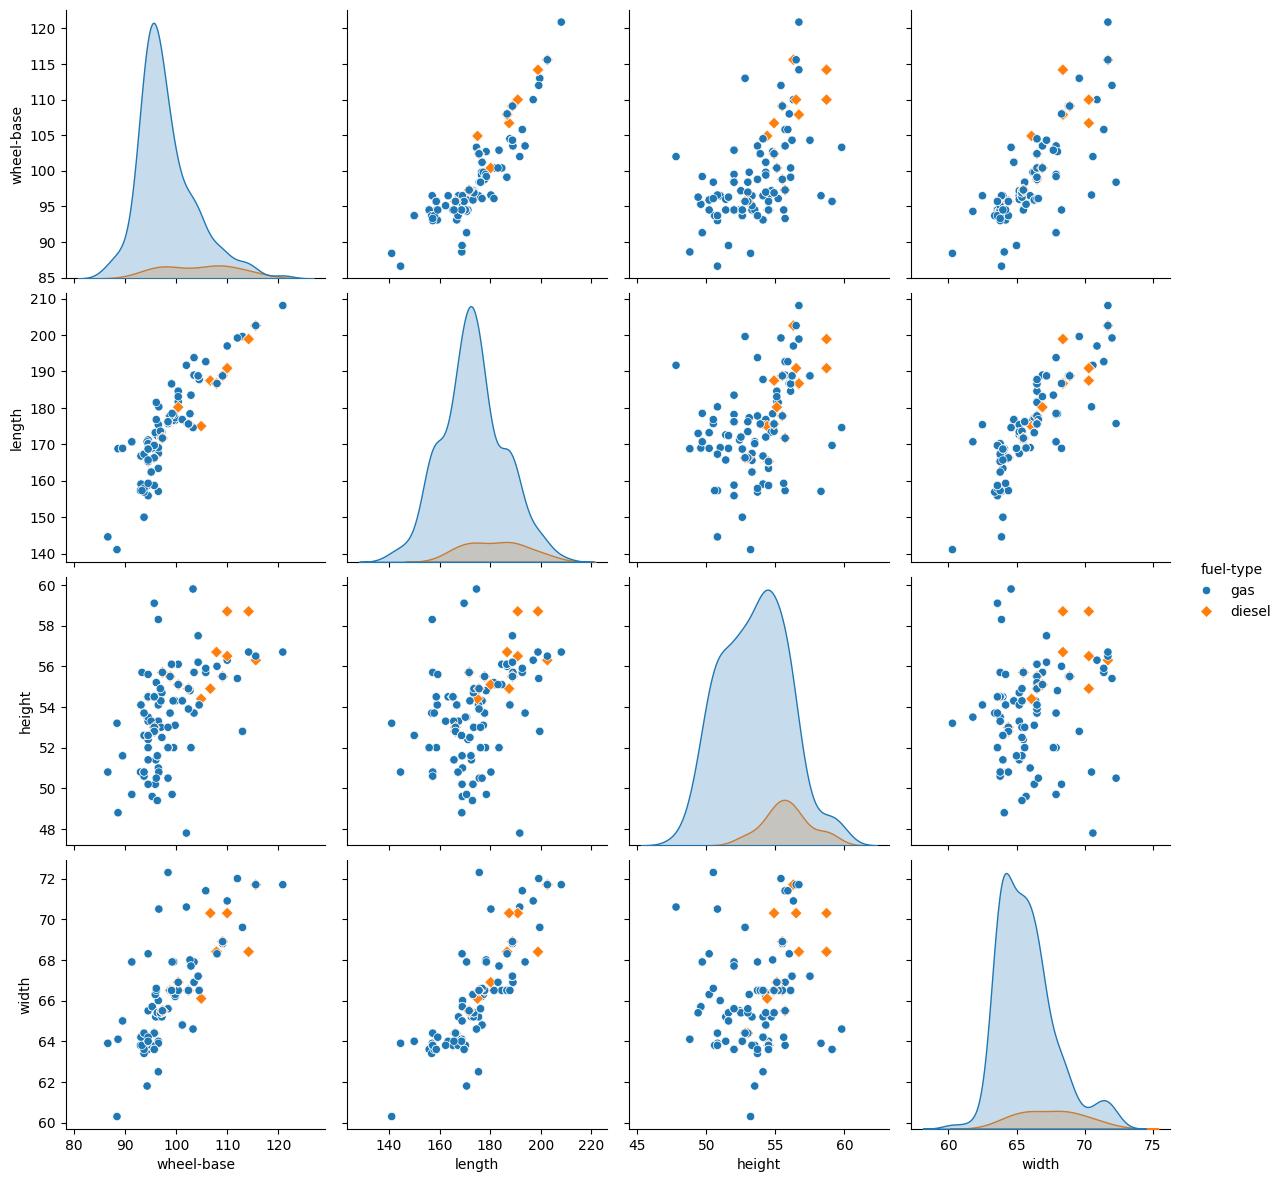

In [5]:
# Use different markers for each level of the hue variable
sns.pairplot(df,hue = 'fuel-type',vars=["wheel-base", "length" , "height" , "width"] ,markers= ['o' , 'D' ] , height=3, aspect=1)
plt.show()

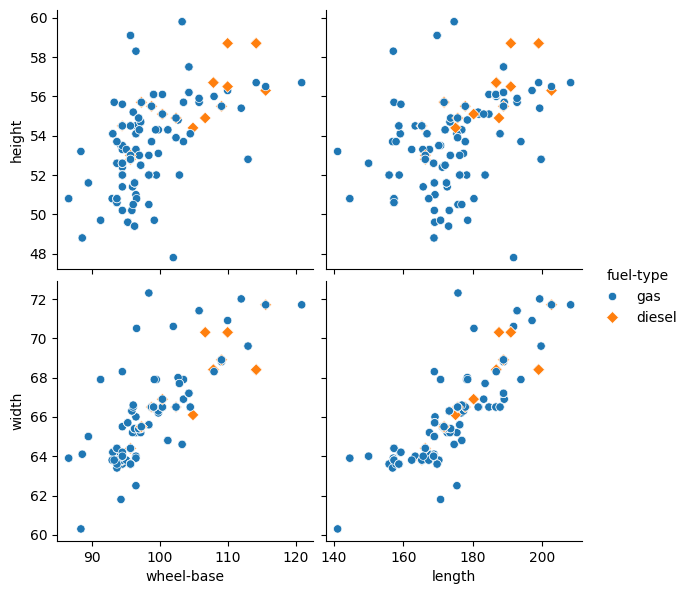

In [6]:
# Defining the y_vars also

# Use different markers for each level of the hue variable
sns.pairplot(df,hue = 'fuel-type',x_vars=["wheel-base", "length"] , y_vars=["height" , "width"],markers= ['o' , 'D' ] , height=3, aspect=1)
plt.show()

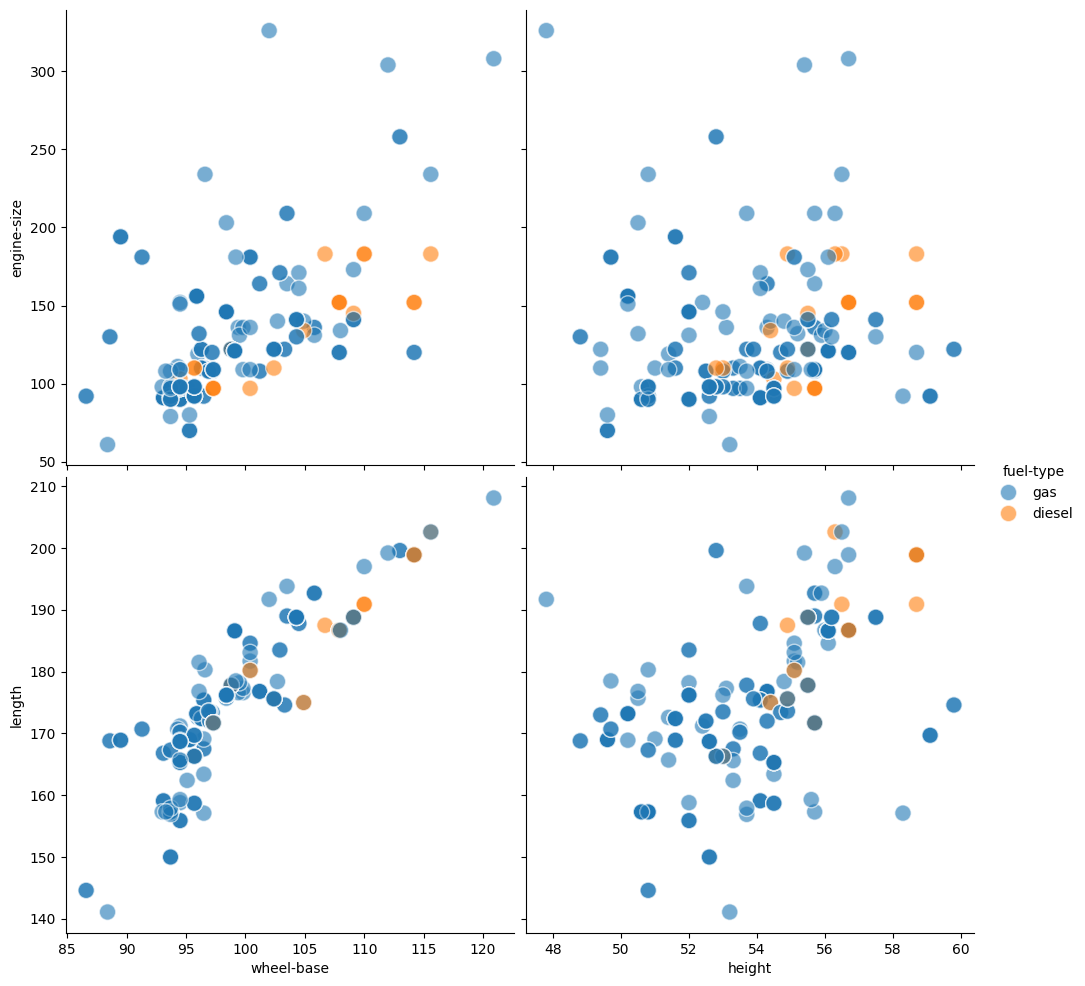

In [7]:
#Adjusting the line width and the height
sns.pairplot(df,hue = 'fuel-type',x_vars=["wheel-base" , "height"] ,y_vars=["engine-size" , "length"] ,plot_kws=dict(s=140, linewidth=1,alpha= .6),height=5, aspect=1)
plt.show()

# | Pair Grid |

Pair Grid is a Subplot grid for plotting pairwise relationships in a dataset. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.

#### ➡️ official documentation   :-  https://seaborn.pydata.org/generated/seaborn.PairGrid.html

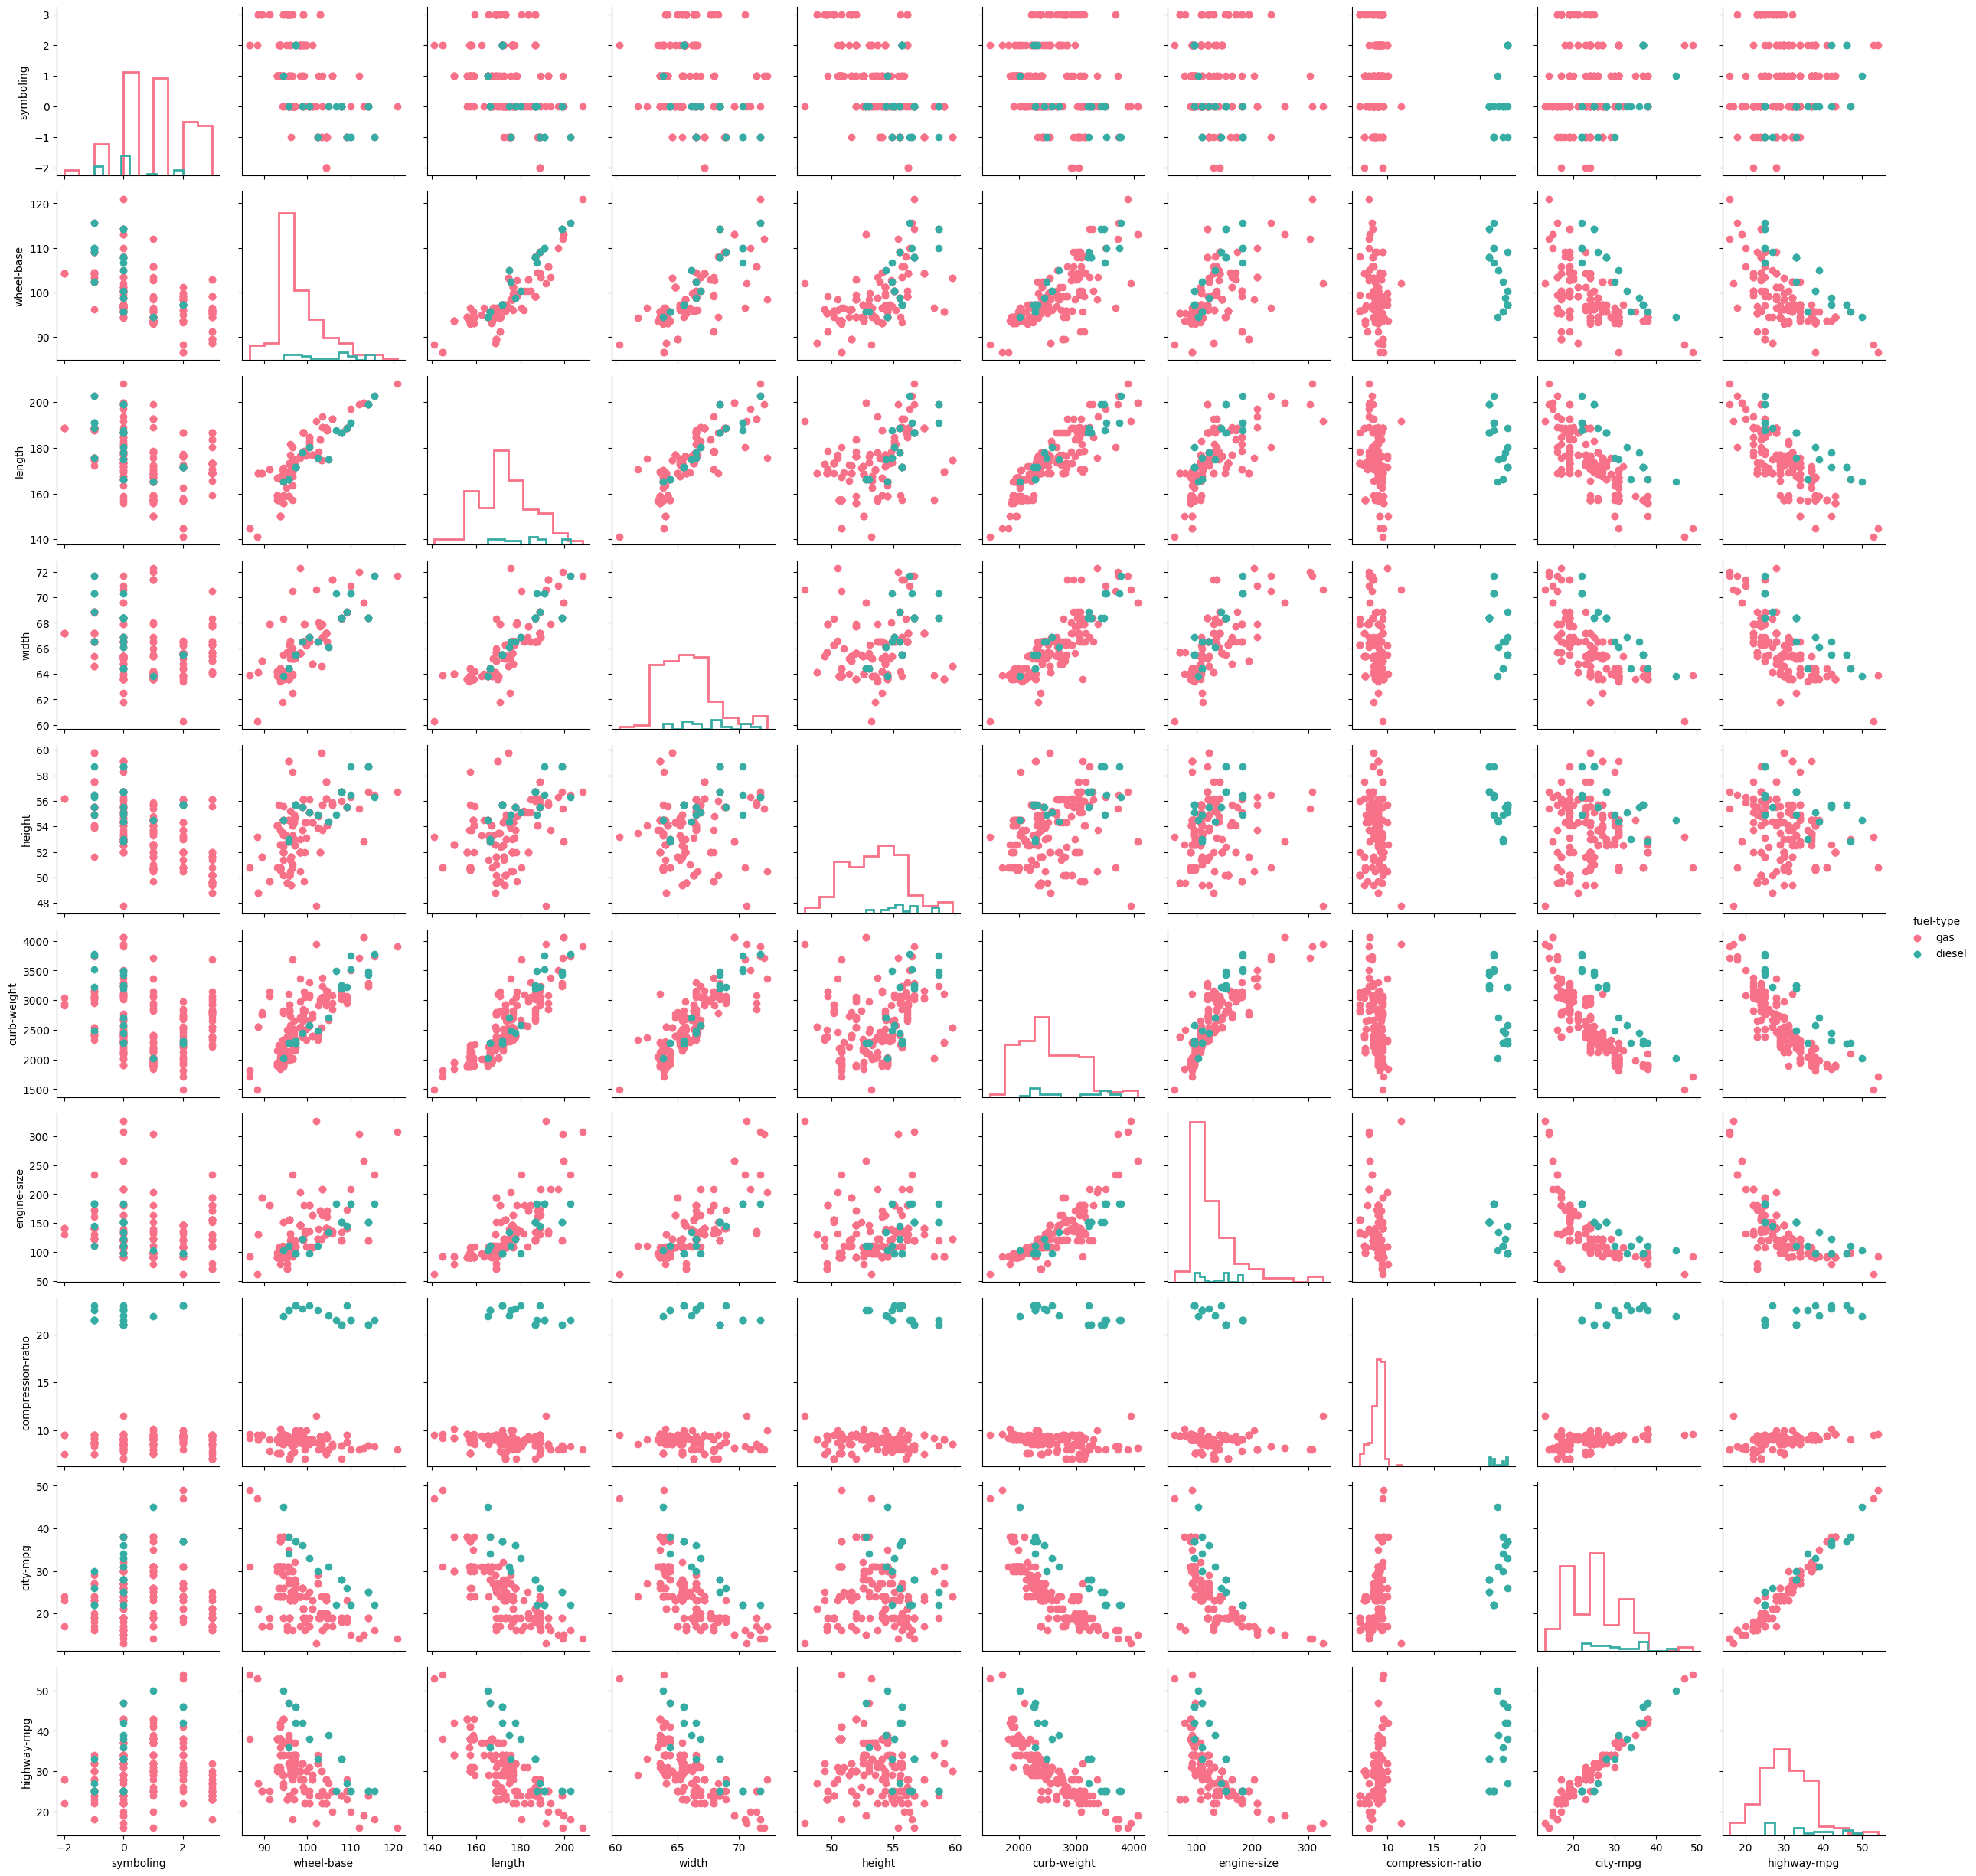

In [8]:
# Histogram on the diagonal
# Changing histogram styling
# Show groups with different colors using "hue"
g = sns.PairGrid(df , hue='fuel-type', palette="husl")
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist,histtype="step", linewidth=2)
g = g.add_legend()
plt.show()

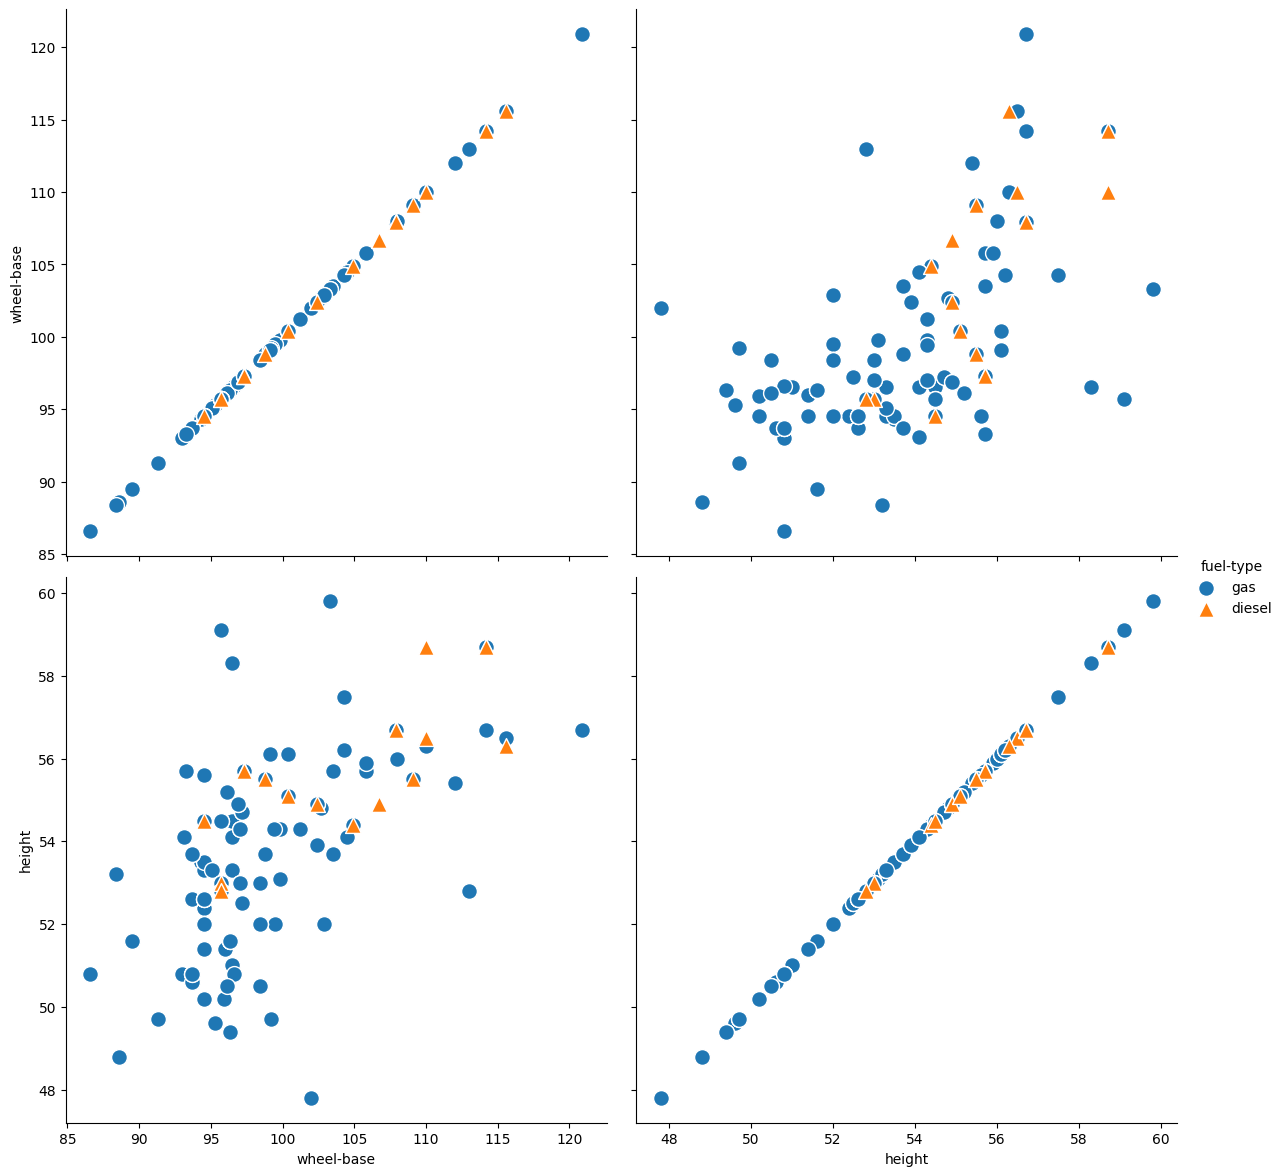

In [9]:
g = sns.PairGrid(df , hue='fuel-type' ,x_vars=["wheel-base" ,"height"],y_vars=["wheel-base" , "height"],height=6, aspect=1 , hue_kws={"marker": ["o", "^", "v"]})
g = g.map(plt.scatter , edgecolor="w", s=130)
g = g.add_legend()
plt.show()

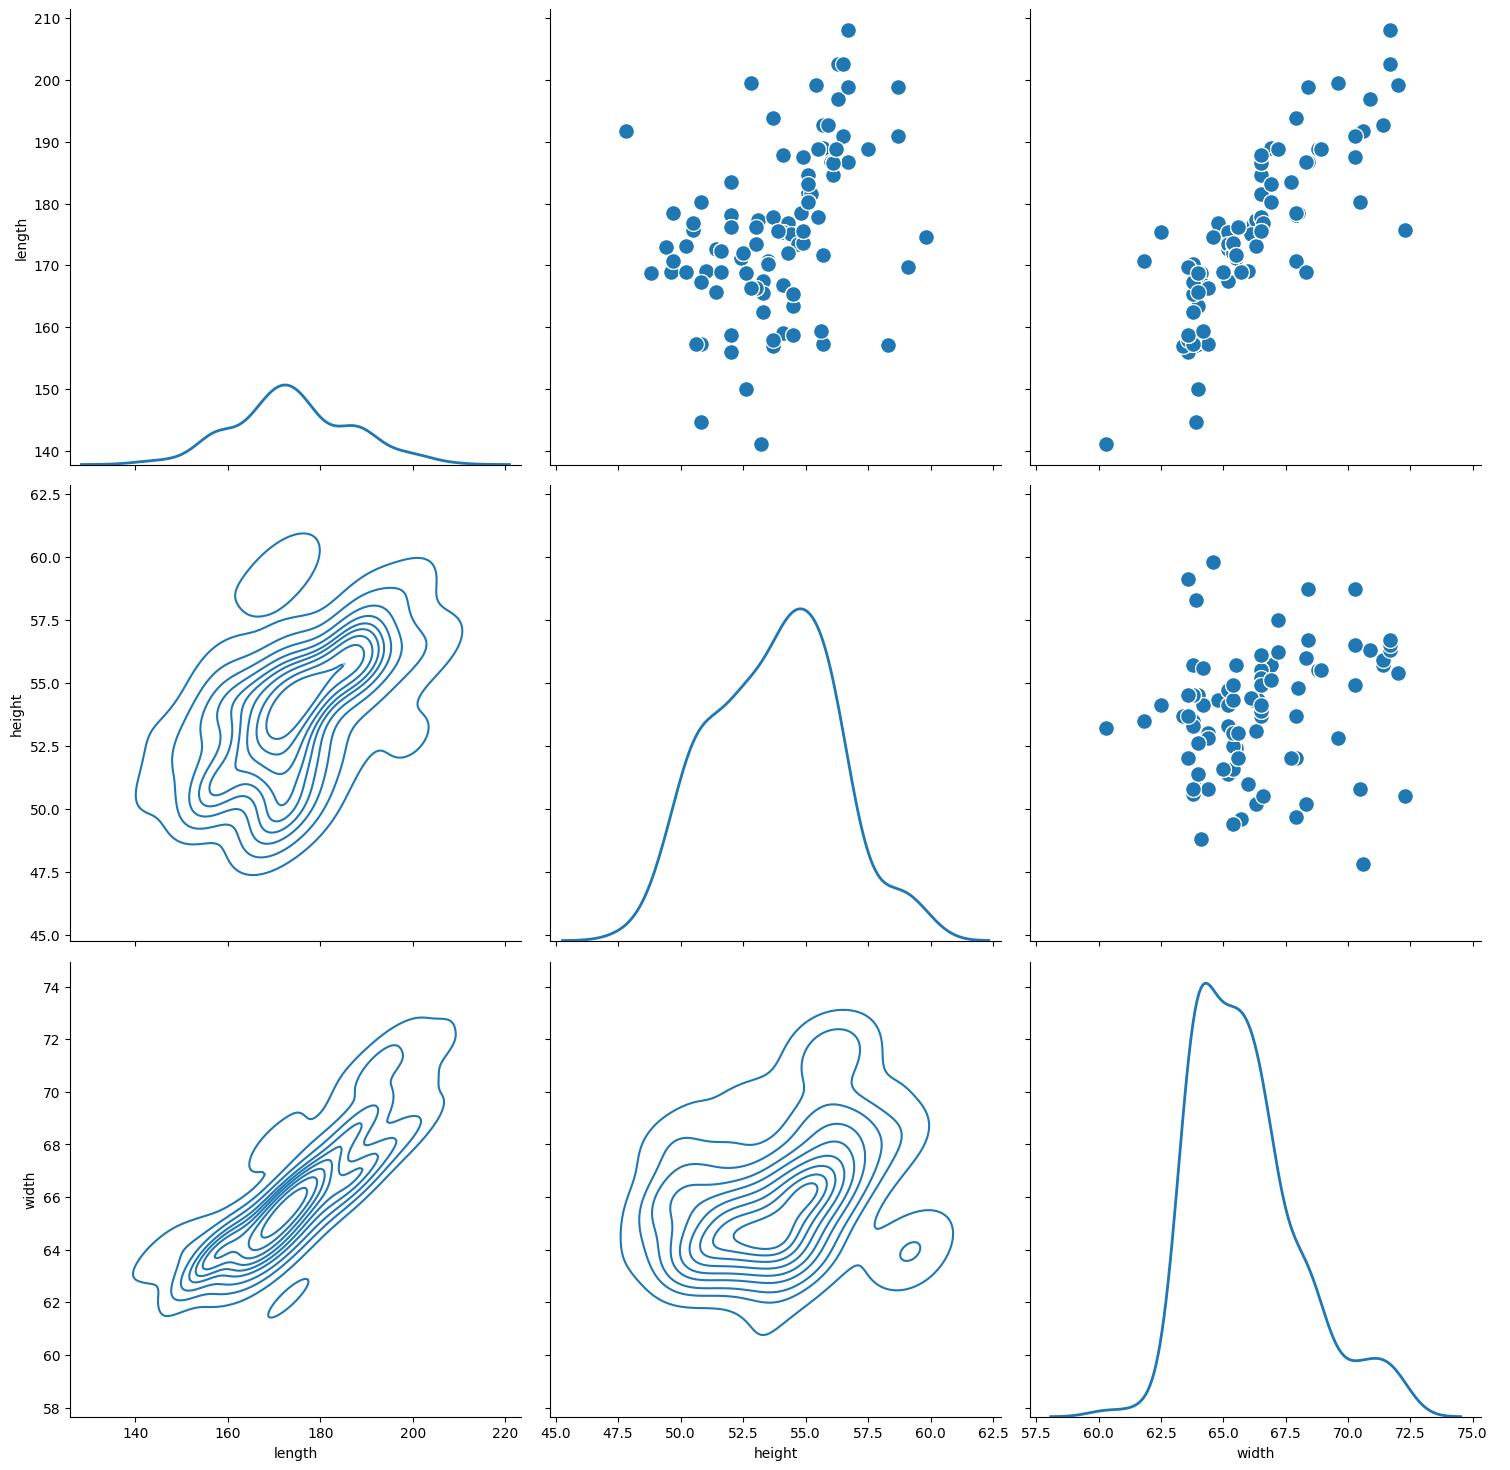

In [10]:
# Using different plots on the upper and lower triangles
g = sns.PairGrid(df,vars=["length" , "height" , "width"],height=5, aspect=1)
g = g.map_upper(sns.scatterplot , edgecolor="w", s=130)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot , lw= 2)
g = g.add_legend()
plt.show()

# | Joint Plot |


Joint plot is used to draw a plot of two variables with bivariate graph and univariate graphs in the margin.

In [11]:
sns.set(style="white", color_codes=True)


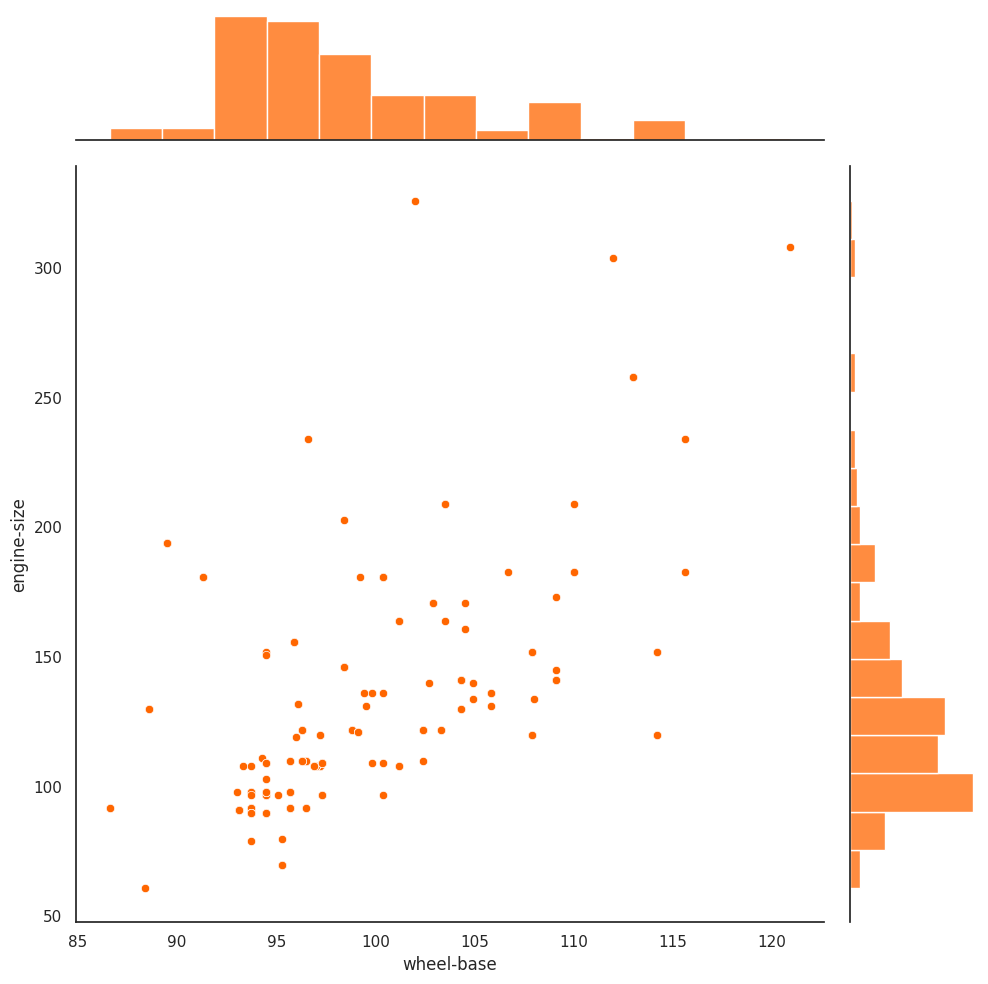

In [12]:
# Change the color of the joint plot
g = sns.jointplot(x="wheel-base", y="engine-size", data=df , height = 10 , color = '#FF6600')

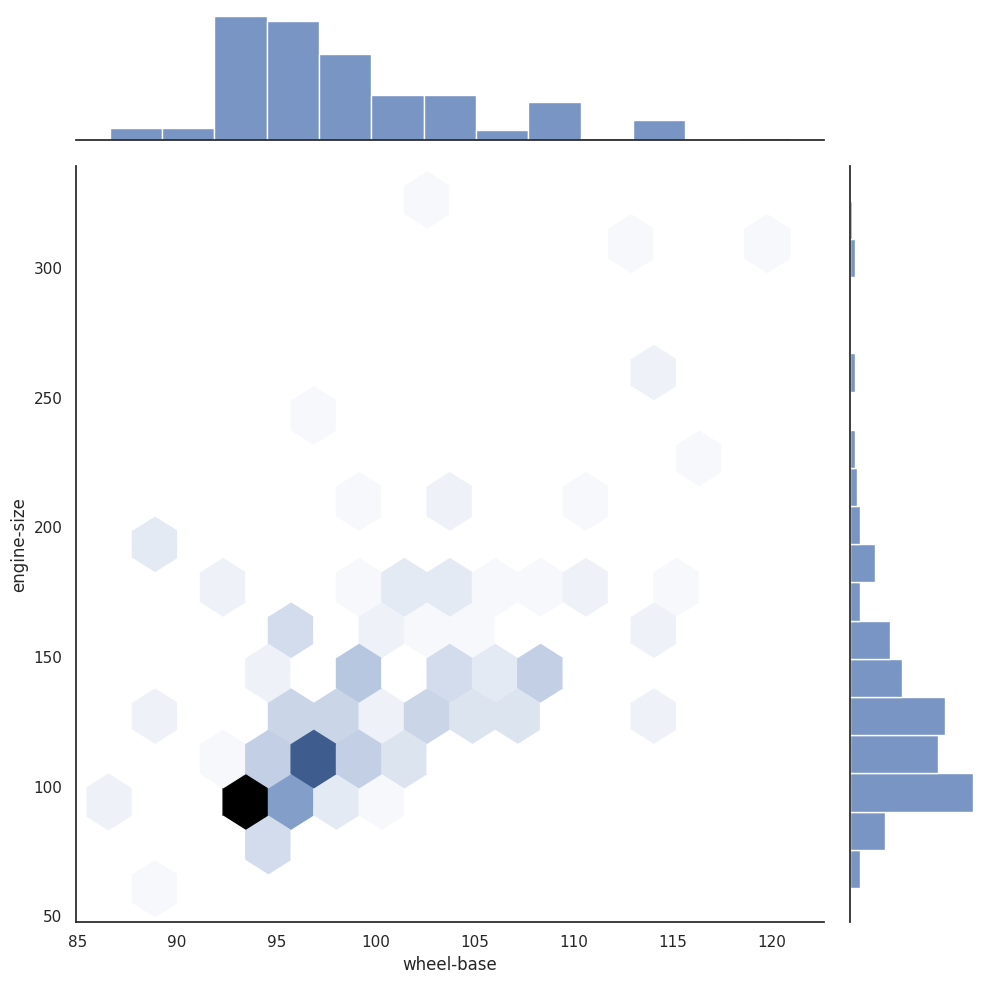

In [13]:
# Replace the scatterplot with a joint histogram using hexagonal bins
sns.jointplot(x="wheel-base", y="engine-size", data=df , height = 10 , kind="hex")

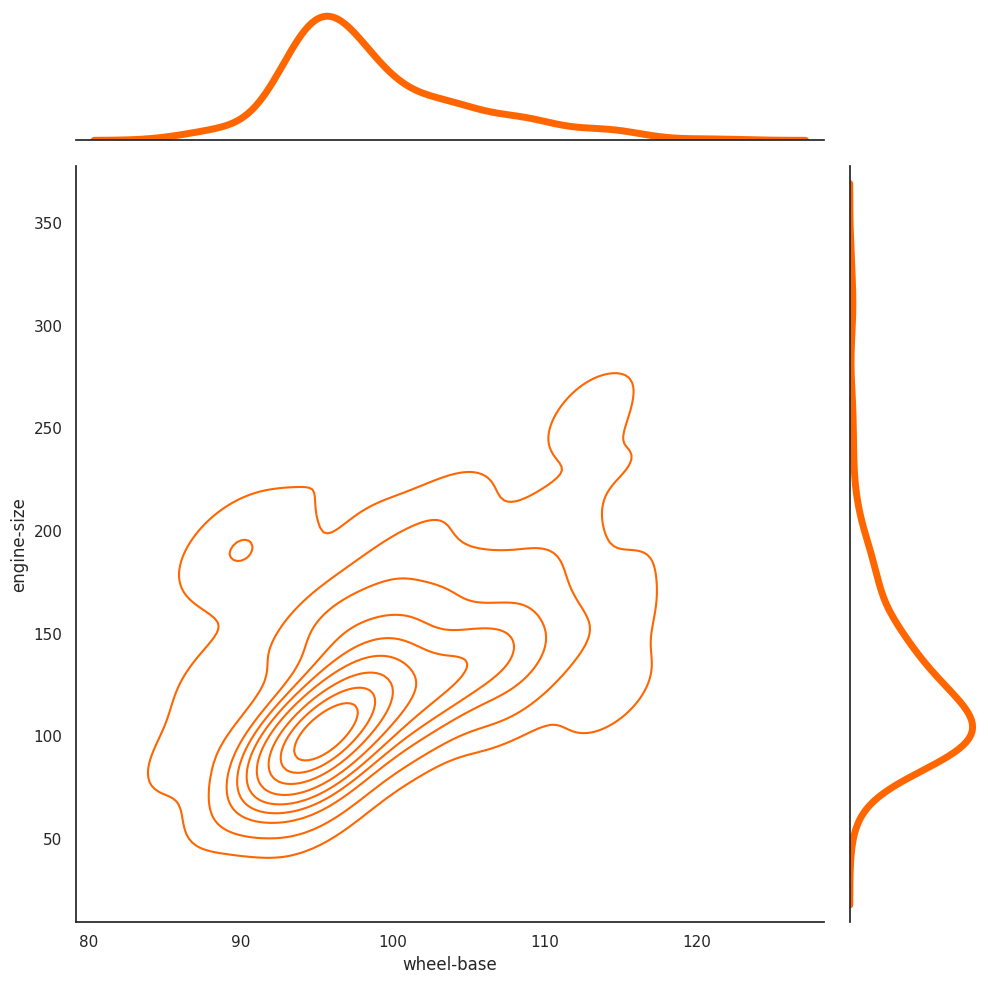

In [14]:
""" Replace the scatterplot & joint histogram with kde plot
in the margins and the interior into a shaded countour plot """
# Change formatting of marginal graphs

sns.jointplot(x="wheel-base", y="engine-size", data=df , height = 10 , kind="kde" , color="#FF6600",marginal_kws={'lw':5})

## | Heat Map |


A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

#### ➡️ official documentation   :-  https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [16]:
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr = df_numeric.corr()

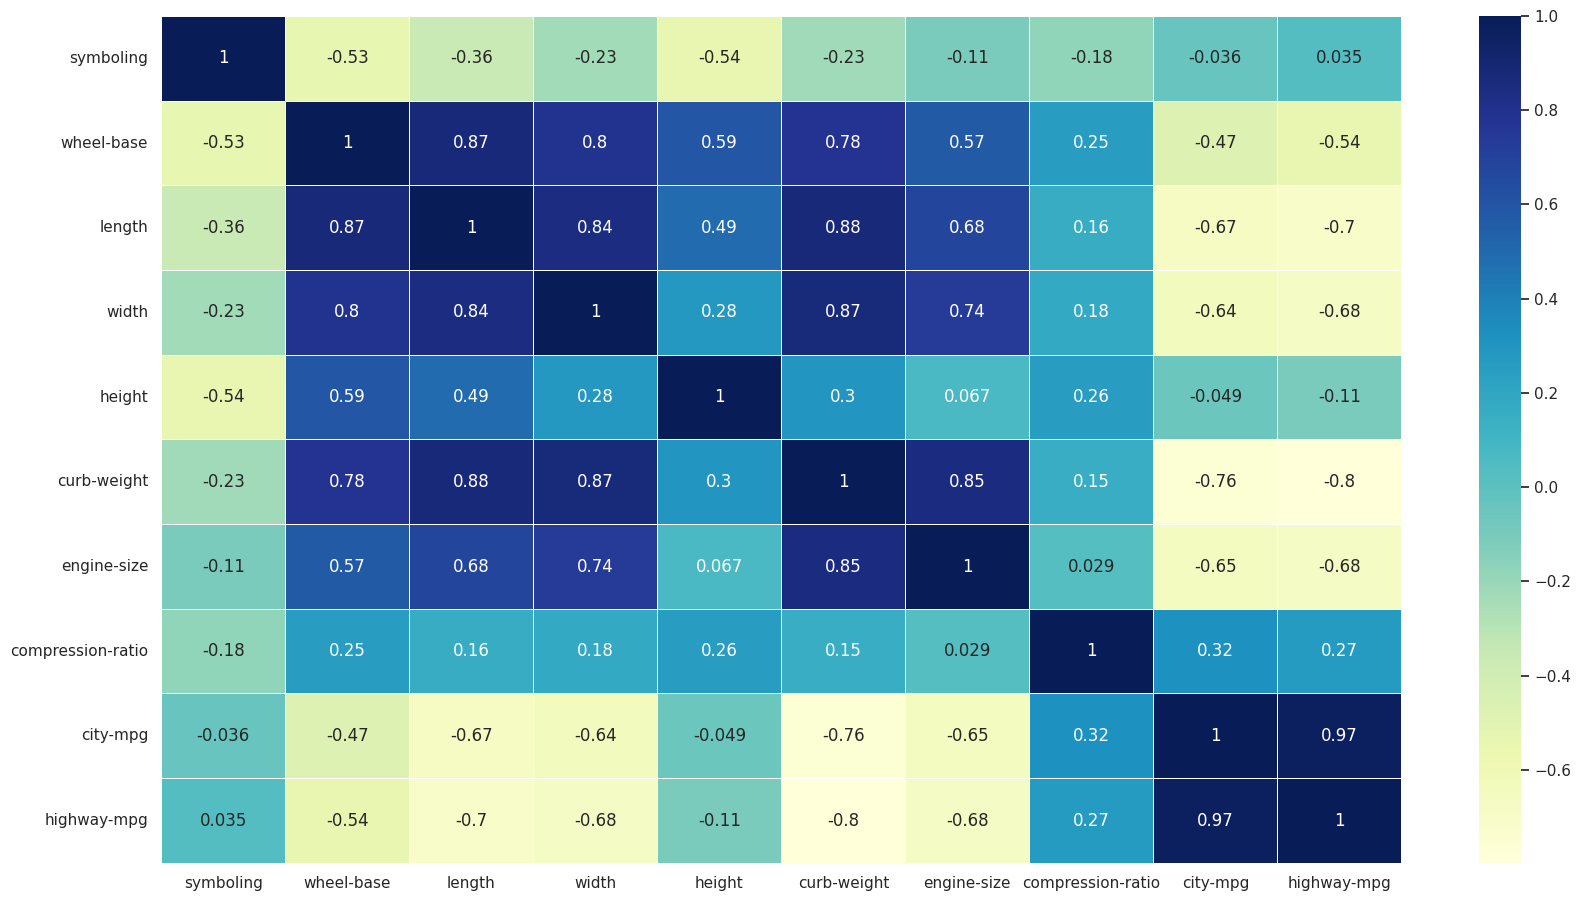

In [17]:
# Annotate each cell with the numeric value using decimal formatting
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5, annot=True )
plt.yticks(rotation=0)
plt.show()

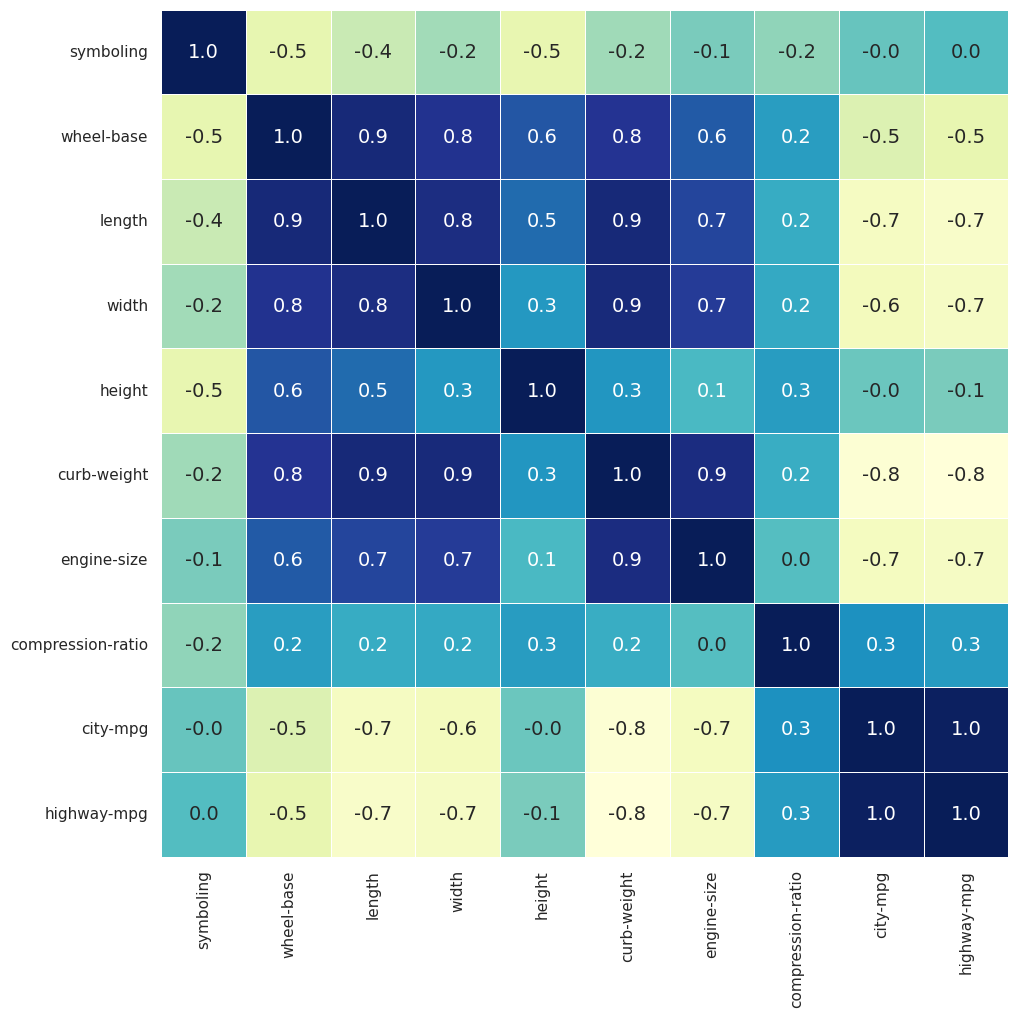

In [18]:
# Force the aspect ratio of the blocks to be equal using "square" parameter
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5,
annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=False ,square = True)
plt.yticks(rotation=0)
plt.show()